In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


pd.set_option('display.max_columns',999)
pd.set_option("display.max_rows", 999)

from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.pipeline import Pipeline

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

from sklearn.metrics import mean_squared_error

from tqdm import tqdm 
import warnings
warnings.filterwarnings('ignore')

In [15]:
df = pd.read_csv('train.csv')

In [5]:
df.shape

(188318, 132)

In [5]:
df.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [16]:
stats = []
for col in df.columns:
    stats.append((col, df[col].nunique(), df[col].isnull().sum() * 100 / df.shape[0], df[col].value_counts(normalize=True, dropna=False).values[0] * 100, df[col].dtype))
    
stats_df = pd.DataFrame(stats, columns=['Feature', 'Unique_values', 'Percentage of missing values', 'Percentage of values in the biggest category', 'type'])
stats_df.sort_values('Percentage of values in the biggest category', ascending=False)

,Feature,Unique_values,Percentage of missing values,Percentage of values in the biggest category,type
70,cat70,2,0.0,99.987787,object
15,cat15,2,0.0,99.981945,object
22,cat22,2,0.0,99.977166,object
62,cat62,2,0.0,99.976104,object
64,cat64,2,0.0,99.975042,object
63,cat63,2,0.0,99.958050,object
68,cat68,2,0.0,99.924596,object
55,cat55,2,0.0,99.923003,object
56,cat56,2,0.0,99.903355,object
20,cat20,2,0.0,99.891673,object


In [17]:
droplist = stats_df[stats_df['Percentage of values in the biggest category']>70]['Feature'].tolist()

In [18]:
df.drop(droplist, axis=1, inplace=True)

In [19]:
df.head()

,id,cat2,cat4,cat5,cat6,cat9,cat72,cat86,cat91,cat92,cat94,cat95,cat97,cat98,cat99,cat100,cat101,cat103,cat104,cat105,cat106,cat107,cat108,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,B,B,A,A,B,A,D,A,A,B,C,A,C,T,B,G,A,I,E,G,J,G,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,B,A,A,A,B,A,D,A,A,D,C,E,D,T,L,F,A,E,E,I,K,K,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,B,A,B,A,B,A,B,A,A,D,C,E,A,D,L,O,B,E,F,H,F,A,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,A,B,A,D,A,A,D,C,E,D,T,I,D,A,E,E,I,K,K,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,B,B,A,A,B,B,B,B,H,B,D,E,A,P,F,J,A,D,E,K,G,B,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [19]:
col = df.columns.tolist()

In [20]:
nums = [x for x in col if x.startswith('con')]
cats = [x for x in col if x.startswith('cat')]

In [24]:
# from sklearn.preprocessing import normalize
# df[nums] = normalize(df[nums])

In [31]:
from sklearn.preprocessing import MinMaxScaler
ms = MinMaxScaler()
df[nums] = ms.fit_transform(df[nums])

In [12]:
# sd = StandardScaler()
# df[nums] = sd.fit_transform(df[nums])

In [32]:
v = df[nums]

<Figure size 720x720 with 0 Axes>

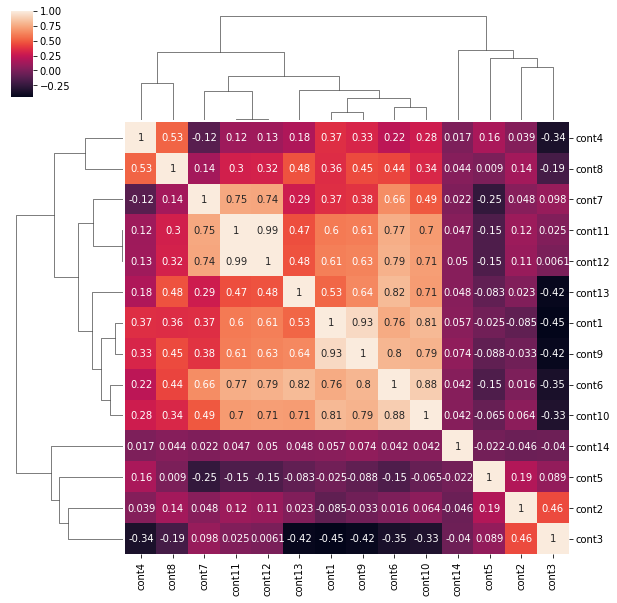

In [33]:
plt.figure(figsize=(10,10))
sns.clustermap(v.corr(),annot=True)

In [21]:
nums.remove('cont1')
nums.remove('cont6')
nums.remove('cont11')
# drop 1,6,11

In [22]:
df.drop(['cont1','cont6','cont11'],axis=1,inplace=True)

In [36]:
nums

['cont2',
 'cont3',
 'cont4',
 'cont5',
 'cont7',
 'cont8',
 'cont9',
 'cont10',
 'cont12',
 'cont13',
 'cont14']

In [13]:
# sd = StandardScaler()
# df[nums] = sd.fit_transform(df[nums])

In [48]:
# from sklearn.preprocessing import normalize
# df[nums] = normalize(df[nums])

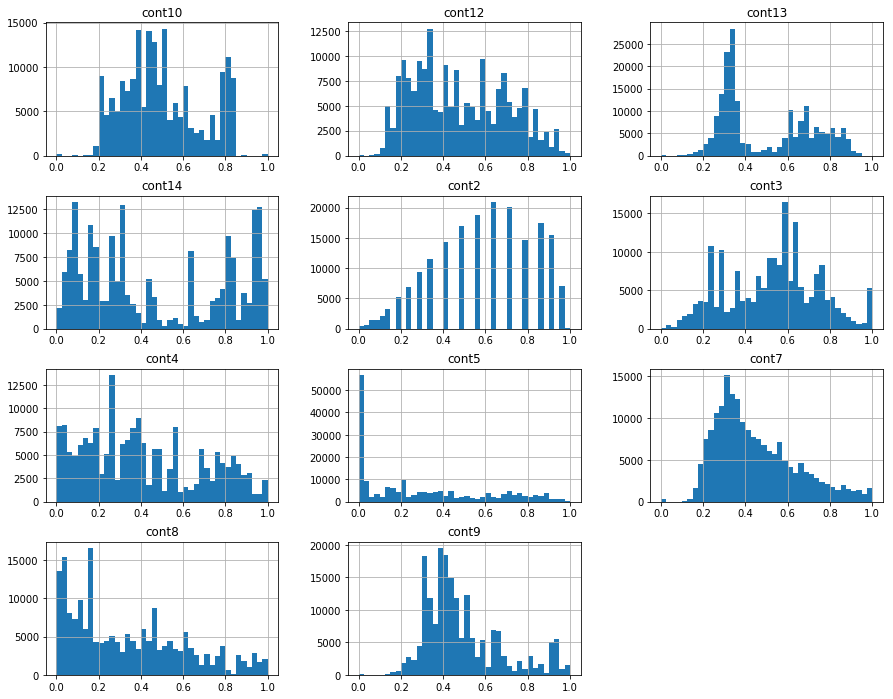

In [37]:
df[nums].hist(figsize=(15,12),bins=40,sharex=False)
plt.show()

In [23]:
df['loss'] = np.log(df.loss)

In [24]:
def calc_smooth_mean(df, by, on, m):
    # Compute the global mean
    mean = df[on].mean()

    # Compute the number of values and the mean of each group
    agg = df.groupby(by)[on].agg(['count', 'mean'])
    counts = agg['count']
    means = agg['mean']

    # Compute the "smoothed" means
    smooth = (counts * means + m * mean) / ((counts + m)*10)

    # Replace each value by the according smoothed mean
    return df[by].map(smooth)

In [25]:
for i in cats:
    df[i] = calc_smooth_mean(df, by=i, on='loss', m=10)

In [26]:
df.head()

,id,cat2,cat4,cat5,cat6,cat9,cat72,cat86,cat91,cat92,cat94,cat95,cat97,cat98,cat99,cat100,cat101,cat103,cat104,cat105,cat106,cat107,cat108,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont2,cont3,cont4,cont5,cont7,cont8,cont9,cont10,cont12,cont13,cont14,loss
0,1,0.792959,0.783258,0.760898,0.777436,0.793413,0.753643,0.769579,0.765547,0.767328,0.760070,0.770861,0.767501,0.773384,0.769589,0.777185,0.789199,0.760898,0.767279,0.765308,0.765311,0.768716,0.773369,0.757432,0.769478,0.782348,0.762294,0.777436,0.766695,0.767459,0.245921,0.187583,0.789639,0.310061,0.335060,0.30260,0.67135,0.83510,0.594646,0.822493,0.714843,7.702186
1,2,0.792959,0.761651,0.760898,0.777436,0.793413,0.753643,0.769579,0.765547,0.767328,0.772671,0.770861,0.768432,0.768139,0.769589,0.803234,0.791437,0.760898,0.766926,0.765308,0.762976,0.765559,0.765035,0.765189,0.761651,0.741626,0.763389,0.777436,0.766695,0.768825,0.737068,0.592681,0.614134,0.885834,0.436585,0.60087,0.35127,0.43919,0.366307,0.611431,0.304496,7.157424
2,5,0.792959,0.761651,0.783142,0.777436,0.793413,0.753643,0.768687,0.765547,0.767328,0.772671,0.770861,0.768432,0.769047,0.778402,0.803234,0.865419,0.768871,0.766926,0.769764,0.765480,0.768276,0.769432,0.766148,0.761651,0.774632,0.767586,0.777436,0.765223,0.762794,0.358319,0.484196,0.236924,0.397069,0.315545,0.27320,0.26076,0.32446,0.373424,0.195709,0.774425,8.008063
3,10,0.792959,0.783258,0.760898,0.777436,0.793413,0.753643,0.769579,0.765547,0.767328,0.772671,0.770861,0.768432,0.768139,0.769589,0.733079,0.761086,0.760898,0.766926,0.765308,0.762976,0.765559,0.765035,0.767121,0.769478,0.770231,0.764923,0.777436,0.766695,0.764848,0.555782,0.527991,0.373816,0.422268,0.391128,0.31796,0.32128,0.44467,0.321570,0.605077,0.602642,6.845720
4,11,0.792959,0.783258,0.760898,0.777436,0.793413,0.793685,0.768687,0.773153,0.770552,0.760070,0.767133,0.768432,0.769047,0.767207,0.777398,0.822888,0.760898,0.769390,0.765308,0.765526,0.773168,0.763858,0.755706,0.769478,0.765446,0.763389,0.777436,0.767697,0.771058,0.159990,0.527991,0.473202,0.704268,0.247408,0.24564,0.22089,0.21230,0.202213,0.246011,0.432606,7.924380


# Modeling begin

In [27]:
x = df.drop(['id','loss'],axis=1)
y = df.loss

In [28]:
validation_size = 0.33
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(x,y,
test_size=validation_size, random_state=seed)

In [29]:
# Test options and evaluation metric
num_folds = 10
seed = 7
scoring = 'neg_mean_squared_error'

In [30]:
models = [('LR',LinearRegression()),
          ('Rd',Ridge()),
         ('Lasso',Lasso()),
         ('EN',ElasticNet()),
         ('Knn',KNeighborsRegressor(n_neighbors=2)),
         ('CART',DecisionTreeRegressor())]

In [31]:
results = []
names = []
means = []
stds = []

In [47]:
for name, model in tqdm(models):
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model,X_train,Y_train,scoring=scoring,cv=kfold)
    
    results.append(np.abs(cv_results))
    names.append(name)
    means.append(np.abs(cv_results.mean()))
    stds.append(cv_results.std())

100%|██████████| 6/6 [00:39<00:00, 10.33s/it]


In [48]:
res = pd.DataFrame(list(zip(names, means, stds)),
              columns=['estimators','mean_val', 'std'])
res.sort_values('mean_val')

,estimators,mean_val,std
0,LR,0.399860,0.005897
1,Rd,0.400659,0.005975
2,Lasso,0.660746,0.009650
3,EN,0.660746,0.009650
4,Knn,0.737512,0.009458
5,CART,0.798412,0.010454


In [34]:
# cv_dict = dict(zip(names,results))
# cv_df = pd.DataFrame.from_dict(cv_dict)
# cv_df.iplot(kind='box')

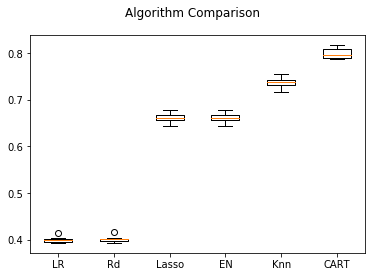

In [49]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [43]:
ensembles = [('AB',AdaBoostRegressor()),
             ('LGB',LGBMRegressor()),
            ('GB',GradientBoostingRegressor()),
            ('RF',RandomForestRegressor(n_jobs=-1)),
            ('ET',ExtraTreesRegressor(n_jobs=-1))]

In [44]:
results1 = []
names1 = []
means1 = []
stds1 = []

In [45]:
for name, model in tqdm(ensembles):
    kfold = KFold(n_splits=num_folds, random_state=seed)
    cv_results = cross_val_score(model,X_train,Y_train,scoring=scoring,cv=kfold)
    
    results1.append(np.abs(cv_results))
    names1.append(name)
    means1.append(np.abs(cv_results.mean()))
    stds1.append(cv_results.std())

100%|██████████| 5/5 [08:26<00:00, 101.39s/it]


In [46]:
res1 = pd.DataFrame(list(zip(names1, means1, stds1)),
              columns=['estimators','mean_val', 'std'])
res1.sort_values('mean_val')

,estimators,mean_val,std
1,LGB,0.372095,0.005743
2,GB,0.386722,0.006389
3,RF,0.440311,0.006763
4,ET,0.451962,0.004926
0,AB,0.510679,0.015806


In [33]:
# res_df = pd.DataFrame.from_dict(dict(zip(names1,results1)))
# res_df.iplot(kind='box')

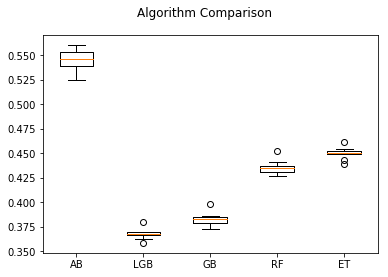

In [36]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results1)
ax.set_xticklabels(names1)
plt.show()

# Let's Tune LightGBM

In [ ]:
# other scikit-learn modules
estimator = LGBMRegressor()

param_grid = {
    'boosting_type': ['dart'],
    'xgboost_dart_mode':[True],
    'n_estimators':[200,400,500,700,900,1000],
    'min_data_in_leaf':[300,400,500,600,700],
    'metric': ['l2'],
    'num_leaves': [21,31,41,51],
    'learning_rate': [0.01, 0.001, 0.05],
    'feature_fraction': [0.5,0.7,0.8,0.9],
    'bagging_fraction': [0.5,0.7,0.8,0.9],
    'bagging_freq': [4,5,6,7,8,9]
}

gbm = GridSearchCV(estimator, param_grid, cv=3)
gbm.fit(X_train, Y_train)

print('Best parameters found by grid search are:', gbm.best_params_)
print(gbm.best_score_)

0.42431519004670415

In [46]:
# create dataset for lightgbm
lgb_train = lgb.Dataset(X_train, Y_train)
lgb_eval = lgb.Dataset(X_validation, Y_validation, reference=lgb_train)

# specify your configurations as a dict
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 'l2',
    'num_leaves': 31,
    'learning_rate': 0.01,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': 0
}

print('Starting training...')
# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=5000,
                valid_sets=lgb_eval,
                early_stopping_rounds=200)

Starting training...
[1]	valid_0's l2: 0.653286
Training until validation scores don't improve for 200 rounds.
[2]	valid_0's l2: 0.649274
[3]	valid_0's l2: 0.645939
[4]	valid_0's l2: 0.641805
[5]	valid_0's l2: 0.637755
[6]	valid_0's l2: 0.633794
[7]	valid_0's l2: 0.62993
[8]	valid_0's l2: 0.626604
[9]	valid_0's l2: 0.623062
[10]	valid_0's l2: 0.619388
[11]	valid_0's l2: 0.61599
[12]	valid_0's l2: 0.612463
[13]	valid_0's l2: 0.609
[14]	valid_0's l2: 0.60577
[15]	valid_0's l2: 0.602445
[16]	valid_0's l2: 0.59918
[17]	valid_0's l2: 0.595958
[18]	valid_0's l2: 0.59281
[19]	valid_0's l2: 0.58971
[20]	valid_0's l2: 0.587297
[21]	valid_0's l2: 0.584323
[22]	valid_0's l2: 0.581472
[23]	valid_0's l2: 0.57858
[24]	valid_0's l2: 0.576123
[25]	valid_0's l2: 0.573369
[26]	valid_0's l2: 0.570646
[27]	valid_0's l2: 0.568137
[28]	valid_0's l2: 0.565451
[29]	valid_0's l2: 0.562869
[30]	valid_0's l2: 0.5604
[31]	valid_0's l2: 0.557989
[32]	valid_0's l2: 0.5555
[33]	valid_0's l2: 0.553076
[34]	valid_0's 

[301]	valid_0's l2: 0.38683
[302]	valid_0's l2: 0.386723
[303]	valid_0's l2: 0.386578
[304]	valid_0's l2: 0.386464
[305]	valid_0's l2: 0.38631
[306]	valid_0's l2: 0.386161
[307]	valid_0's l2: 0.386044
[308]	valid_0's l2: 0.385934
[309]	valid_0's l2: 0.385788
[310]	valid_0's l2: 0.385685
[311]	valid_0's l2: 0.385522
[312]	valid_0's l2: 0.38535
[313]	valid_0's l2: 0.385211
[314]	valid_0's l2: 0.385046
[315]	valid_0's l2: 0.384887
[316]	valid_0's l2: 0.384792
[317]	valid_0's l2: 0.384684
[318]	valid_0's l2: 0.384584
[319]	valid_0's l2: 0.384483
[320]	valid_0's l2: 0.384394
[321]	valid_0's l2: 0.384255
[322]	valid_0's l2: 0.384114
[323]	valid_0's l2: 0.383986
[324]	valid_0's l2: 0.383863
[325]	valid_0's l2: 0.383717
[326]	valid_0's l2: 0.383593
[327]	valid_0's l2: 0.383472
[328]	valid_0's l2: 0.383353
[329]	valid_0's l2: 0.383246
[330]	valid_0's l2: 0.383144
[331]	valid_0's l2: 0.383059
[332]	valid_0's l2: 0.382978
[333]	valid_0's l2: 0.382905
[334]	valid_0's l2: 0.382822
[335]	valid_0's l

[593]	valid_0's l2: 0.369746
[594]	valid_0's l2: 0.369727
[595]	valid_0's l2: 0.369684
[596]	valid_0's l2: 0.369666
[597]	valid_0's l2: 0.369648
[598]	valid_0's l2: 0.369632
[599]	valid_0's l2: 0.36961
[600]	valid_0's l2: 0.369588
[601]	valid_0's l2: 0.369575
[602]	valid_0's l2: 0.369561
[603]	valid_0's l2: 0.369547
[604]	valid_0's l2: 0.369535
[605]	valid_0's l2: 0.369519
[606]	valid_0's l2: 0.369487
[607]	valid_0's l2: 0.369461
[608]	valid_0's l2: 0.369431
[609]	valid_0's l2: 0.369418
[610]	valid_0's l2: 0.369407
[611]	valid_0's l2: 0.369387
[612]	valid_0's l2: 0.369362
[613]	valid_0's l2: 0.369351
[614]	valid_0's l2: 0.369333
[615]	valid_0's l2: 0.369312
[616]	valid_0's l2: 0.369275
[617]	valid_0's l2: 0.369263
[618]	valid_0's l2: 0.369239
[619]	valid_0's l2: 0.369215
[620]	valid_0's l2: 0.369192
[621]	valid_0's l2: 0.369166
[622]	valid_0's l2: 0.369144
[623]	valid_0's l2: 0.369123
[624]	valid_0's l2: 0.369103
[625]	valid_0's l2: 0.369086
[626]	valid_0's l2: 0.369072
[627]	valid_0's

[915]	valid_0's l2: 0.366523
[916]	valid_0's l2: 0.366515
[917]	valid_0's l2: 0.366509
[918]	valid_0's l2: 0.366507
[919]	valid_0's l2: 0.366502
[920]	valid_0's l2: 0.366495
[921]	valid_0's l2: 0.366496
[922]	valid_0's l2: 0.366496
[923]	valid_0's l2: 0.366498
[924]	valid_0's l2: 0.366502
[925]	valid_0's l2: 0.366498
[926]	valid_0's l2: 0.366492
[927]	valid_0's l2: 0.366488
[928]	valid_0's l2: 0.36648
[929]	valid_0's l2: 0.366477
[930]	valid_0's l2: 0.366475
[931]	valid_0's l2: 0.366471
[932]	valid_0's l2: 0.366469
[933]	valid_0's l2: 0.366465
[934]	valid_0's l2: 0.366465
[935]	valid_0's l2: 0.366461
[936]	valid_0's l2: 0.366459
[937]	valid_0's l2: 0.366454
[938]	valid_0's l2: 0.366451
[939]	valid_0's l2: 0.366449
[940]	valid_0's l2: 0.366444
[941]	valid_0's l2: 0.366438
[942]	valid_0's l2: 0.366428
[943]	valid_0's l2: 0.366426
[944]	valid_0's l2: 0.366418
[945]	valid_0's l2: 0.366411
[946]	valid_0's l2: 0.366407
[947]	valid_0's l2: 0.366404
[948]	valid_0's l2: 0.366401
[949]	valid_0's

[1213]	valid_0's l2: 0.365605
[1214]	valid_0's l2: 0.365603
[1215]	valid_0's l2: 0.365599
[1216]	valid_0's l2: 0.365597
[1217]	valid_0's l2: 0.365596
[1218]	valid_0's l2: 0.365594
[1219]	valid_0's l2: 0.365594
[1220]	valid_0's l2: 0.365593
[1221]	valid_0's l2: 0.36559
[1222]	valid_0's l2: 0.365588
[1223]	valid_0's l2: 0.365585
[1224]	valid_0's l2: 0.365581
[1225]	valid_0's l2: 0.365581
[1226]	valid_0's l2: 0.365574
[1227]	valid_0's l2: 0.36557
[1228]	valid_0's l2: 0.365563
[1229]	valid_0's l2: 0.365561
[1230]	valid_0's l2: 0.365556
[1231]	valid_0's l2: 0.365554
[1232]	valid_0's l2: 0.365551
[1233]	valid_0's l2: 0.36555
[1234]	valid_0's l2: 0.365546
[1235]	valid_0's l2: 0.365545
[1236]	valid_0's l2: 0.365543
[1237]	valid_0's l2: 0.36554
[1238]	valid_0's l2: 0.365538
[1239]	valid_0's l2: 0.365535
[1240]	valid_0's l2: 0.365533
[1241]	valid_0's l2: 0.36553
[1242]	valid_0's l2: 0.365528
[1243]	valid_0's l2: 0.365526
[1244]	valid_0's l2: 0.365523
[1245]	valid_0's l2: 0.36552
[1246]	valid_0's

[1507]	valid_0's l2: 0.365107
[1508]	valid_0's l2: 0.365108
[1509]	valid_0's l2: 0.365108
[1510]	valid_0's l2: 0.36511
[1511]	valid_0's l2: 0.365108
[1512]	valid_0's l2: 0.365106
[1513]	valid_0's l2: 0.365103
[1514]	valid_0's l2: 0.365101
[1515]	valid_0's l2: 0.365099
[1516]	valid_0's l2: 0.3651
[1517]	valid_0's l2: 0.365101
[1518]	valid_0's l2: 0.365102
[1519]	valid_0's l2: 0.365104
[1520]	valid_0's l2: 0.3651
[1521]	valid_0's l2: 0.3651
[1522]	valid_0's l2: 0.3651
[1523]	valid_0's l2: 0.3651
[1524]	valid_0's l2: 0.365098
[1525]	valid_0's l2: 0.365096
[1526]	valid_0's l2: 0.365095
[1527]	valid_0's l2: 0.365095
[1528]	valid_0's l2: 0.365094
[1529]	valid_0's l2: 0.365093
[1530]	valid_0's l2: 0.365093
[1531]	valid_0's l2: 0.365095
[1532]	valid_0's l2: 0.365094
[1533]	valid_0's l2: 0.365093
[1534]	valid_0's l2: 0.365091
[1535]	valid_0's l2: 0.36509
[1536]	valid_0's l2: 0.36509
[1537]	valid_0's l2: 0.365092
[1538]	valid_0's l2: 0.365094
[1539]	valid_0's l2: 0.365094
[1540]	valid_0's l2: 0.

[1826]	valid_0's l2: 0.364981
[1827]	valid_0's l2: 0.364983
[1828]	valid_0's l2: 0.364984
[1829]	valid_0's l2: 0.364986
[1830]	valid_0's l2: 0.364988
[1831]	valid_0's l2: 0.364986
[1832]	valid_0's l2: 0.364986
[1833]	valid_0's l2: 0.364984
[1834]	valid_0's l2: 0.364981
[1835]	valid_0's l2: 0.364982
[1836]	valid_0's l2: 0.364984
[1837]	valid_0's l2: 0.364984
[1838]	valid_0's l2: 0.364985
[1839]	valid_0's l2: 0.364985
[1840]	valid_0's l2: 0.364986
[1841]	valid_0's l2: 0.364983
[1842]	valid_0's l2: 0.364979
[1843]	valid_0's l2: 0.364977
[1844]	valid_0's l2: 0.364972
[1845]	valid_0's l2: 0.364968
[1846]	valid_0's l2: 0.364967
[1847]	valid_0's l2: 0.364965
[1848]	valid_0's l2: 0.364964
[1849]	valid_0's l2: 0.364964
[1850]	valid_0's l2: 0.364962
[1851]	valid_0's l2: 0.364963
[1852]	valid_0's l2: 0.364965
[1853]	valid_0's l2: 0.364966
[1854]	valid_0's l2: 0.364967
[1855]	valid_0's l2: 0.364966
[1856]	valid_0's l2: 0.364966
[1857]	valid_0's l2: 0.364965
[1858]	valid_0's l2: 0.364965
[1859]	val

[2100]	valid_0's l2: 0.364748
[2101]	valid_0's l2: 0.364743
[2102]	valid_0's l2: 0.364739
[2103]	valid_0's l2: 0.364739
[2104]	valid_0's l2: 0.364736
[2105]	valid_0's l2: 0.364739
[2106]	valid_0's l2: 0.364736
[2107]	valid_0's l2: 0.364734
[2108]	valid_0's l2: 0.364732
[2109]	valid_0's l2: 0.36473
[2110]	valid_0's l2: 0.364729
[2111]	valid_0's l2: 0.364727
[2112]	valid_0's l2: 0.364726
[2113]	valid_0's l2: 0.364725
[2114]	valid_0's l2: 0.364723
[2115]	valid_0's l2: 0.364718
[2116]	valid_0's l2: 0.36472
[2117]	valid_0's l2: 0.364721
[2118]	valid_0's l2: 0.364721
[2119]	valid_0's l2: 0.364723
[2120]	valid_0's l2: 0.364723
[2121]	valid_0's l2: 0.364725
[2122]	valid_0's l2: 0.364726
[2123]	valid_0's l2: 0.364723
[2124]	valid_0's l2: 0.364723
[2125]	valid_0's l2: 0.364723
[2126]	valid_0's l2: 0.364721
[2127]	valid_0's l2: 0.364718
[2128]	valid_0's l2: 0.364718
[2129]	valid_0's l2: 0.364717
[2130]	valid_0's l2: 0.364715
[2131]	valid_0's l2: 0.364716
[2132]	valid_0's l2: 0.364716
[2133]	valid

In [50]:
pd.DataFrame(list(zip(X_train.columns,gbm.feature_importance())),columns=['feats','score']).sort_values('score',
                                                                                                       ascending=False)

,feats,score
39,cont14,6264
14,cat100,4382
33,cont7,3500
29,cont2,2836
24,cat112,2820
26,cat114,2520
38,cont13,2486
37,cont12,2306
28,cat116,2249
34,cont8,2233


# Meta ensemble model

In [17]:
x = df.drop(['id','loss'],axis=1)
y = df.loss

In [18]:
del df

In [19]:
validation_size = 0.50
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(x,y,
test_size=validation_size, random_state=seed)

In [20]:
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import HuberRegressor
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.linear_model import RANSACRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.isotonic import IsotonicRegression

('BR',BayesianRidge(n_iter=50)),('AR',ARDRegression(n_iter=10)),
          ('IS',IsotonicRegression()),
          ('GP',GaussianProcessRegressor()),

In [28]:
models = [('LR',LinearRegression()),
          ('RD',Ridge()),
          ('HR',HuberRegressor()),
          ('PAR',PassiveAggressiveRegressor()),
          ('RAN',RANSACRegressor()),
          ('SG',SGDRegressor()),
         ('Lasso',Lasso()),
         ('EN',ElasticNet()),
         ('Knn',KNeighborsRegressor(n_neighbors=2)),
         ('CART',DecisionTreeRegressor()),
         ('AB',AdaBoostRegressor()),
             ('LGB',LGBMRegressor()),
            ('GB',GradientBoostingRegressor()),
            ('RF',RandomForestRegressor(n_jobs=-1)),
            ('ET',ExtraTreesRegressor(n_jobs=-1))]

In [29]:
meta = pd.DataFrame()

for name,model in tqdm(models):
    model.fit(X_train, Y_train)
    
    y_pred = model.predict(X_validation)
    meta[name] = y_pred

100%|██████████| 15/15 [00:41<00:00,  4.57s/it]


In [30]:
meta['loss'] = Y_validation.values

In [31]:
meta.head()

,LR,RD,HR,PAR,RAN,SG,Lasso,EN,Knn,CART,AB,LGB,GB,RF,ET,loss
0,8.653514,8.627745,8.626499,8.671909,9.358634,7.794783,7.684767,7.684767,8.711311,7.622292,7.819032,8.618070,8.609712,8.583448,8.755307,9.262557
1,7.525162,7.546598,7.537889,7.562535,7.495738,7.791151,7.684767,7.684767,8.131868,7.172233,7.553486,7.336874,7.510218,7.376246,7.659017,6.427410
2,7.188341,7.178140,7.094132,7.847903,7.291503,7.418407,7.684767,7.684767,7.347040,8.264791,7.270350,7.177788,7.170589,6.988145,6.999797,8.115327
3,7.291095,7.308602,7.260309,7.217011,6.768814,7.672818,7.684767,7.684767,7.123781,7.403177,7.190029,7.099183,7.250932,7.147981,6.929407,8.182227
4,7.148251,7.184114,7.159560,7.148758,7.445558,7.519613,7.684767,7.684767,5.755979,6.900650,7.190029,7.166513,6.932861,6.711858,6.861378,7.463575


<Figure size 1080x1080 with 0 Axes>

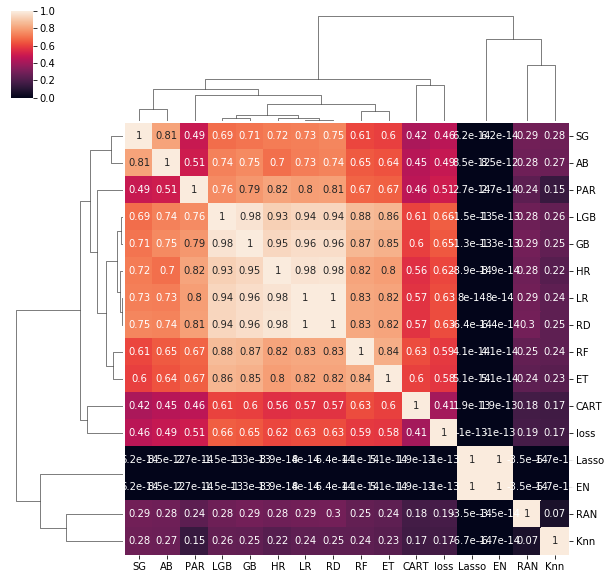

In [33]:
plt.figure(figsize=(15,15))
sns.clustermap(meta.corr(),annot=True)

In [ ]:
sg,ab
par*3
lgb*6
gb*5
hr*4
lr*2
rd*2
rf*1
et*0
lasso*del

In [40]:
meta.drop(['PAR','LGB','GB','HR','Lasso'],axis=1,inplace=True)

<Figure size 1080x1080 with 0 Axes>

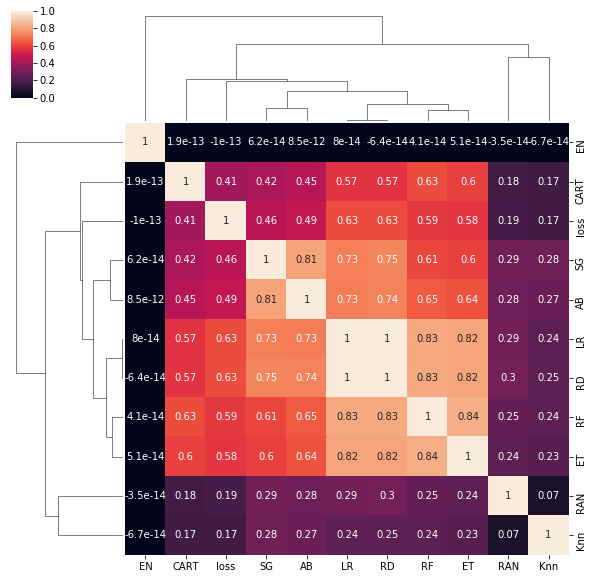

In [41]:
plt.figure(figsize=(15,15))
sns.clustermap(meta.corr(),annot=True)

In [42]:
meta.drop(['SG','LR','RF'],axis=1,inplace=True)

In [43]:
x = meta.drop('loss',axis=1)
y = meta.loss

validation_size = 0.33
seed = 0
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=validation_size, random_state=seed)

In [44]:
from sklearn.neural_network import MLPRegressor
mlp = MLPRegressor(hidden_layer_sizes=(50,30,50))
mlp.fit(x_train,y_train)

MLPRegressor(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(50, 30, 50), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [45]:
y_pred = mlp.predict(x_test)
mean_squared_error(y_test,y_pred)

0.418886448082281